In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from collections import Counter
%matplotlib inline

In [ ]:
#importing Dataset from <data.gov.ie>

In [6]:
data1=pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FSA01/CSV/1.0/en")

In [8]:
data1.head()

,STATISTIC CODE,Statistic,C02122V02563,Farm Size,C02196V02652,Region,TLIST(A1),Year,UNIT,VALUE
0,FSA01,Number of Farms,8,< 10 ha,-,State,2013,2013,Thousand,25.4
1,FSA01,Number of Farms,8,< 10 ha,-,State,2016,2016,Thousand,26.2
2,FSA01,Number of Farms,8,< 10 ha,IE1,"Border, Midland and Western",2013,2013,Thousand,15.6
3,FSA01,Number of Farms,8,< 10 ha,IE1,"Border, Midland and Western",2016,2016,Thousand,15.8
4,FSA01,Number of Farms,8,< 10 ha,IE11,Border,2013,2013,Thousand,6.5


In [ ]:
#cleaning data

In [9]:
data2=data1.rename(columns={"Farm Size":"FARM_SIZE", "VALUE":"NUMBER_OF_FARMS_AREA_000"})

In [10]:
data2.head()

,STATISTIC CODE,Statistic,C02122V02563,FARM_SIZE,C02196V02652,Region,TLIST(A1),Year,UNIT,NUMBER_OF_FARMS_AREA_000
0,FSA01,Number of Farms,8,< 10 ha,-,State,2013,2013,Thousand,25.4
1,FSA01,Number of Farms,8,< 10 ha,-,State,2016,2016,Thousand,26.2
2,FSA01,Number of Farms,8,< 10 ha,IE1,"Border, Midland and Western",2013,2013,Thousand,15.6
3,FSA01,Number of Farms,8,< 10 ha,IE1,"Border, Midland and Western",2016,2016,Thousand,15.8
4,FSA01,Number of Farms,8,< 10 ha,IE11,Border,2013,2013,Thousand,6.5


In [11]:
data3=data2[["FARM_SIZE", "Region","Year", "NUMBER_OF_FARMS_AREA_000"]]

In [12]:
data3.head()

,FARM_SIZE,Region,Year,NUMBER_OF_FARMS_AREA_000
0,< 10 ha,State,2013,25.4
1,< 10 ha,State,2016,26.2
2,< 10 ha,"Border, Midland and Western",2013,15.6
3,< 10 ha,"Border, Midland and Western",2016,15.8
4,< 10 ha,Border,2013,6.5


In [14]:
data3.isnull().sum()

FARM_SIZE                   0
Region                      0
Year                        0
NUMBER_OF_FARMS_AREA_000    0
dtype: int64

In [15]:
data3.duplicated().sum()

0

In [13]:
data3.describe()

,Year,NUMBER_OF_FARMS_AREA_000
count,140.000000,140.000000
mean,2014.500000,11.875714
std,1.505386,20.202952
min,2013.000000,0.400000
25%,2013.000000,2.375000
50%,2014.500000,4.650000
75%,2016.000000,13.625000
max,2016.000000,139.600000


array([[<AxesSubplot:title={'center':'NUMBER_OF_FARMS_AREA_000'}>]],
      dtype=object)

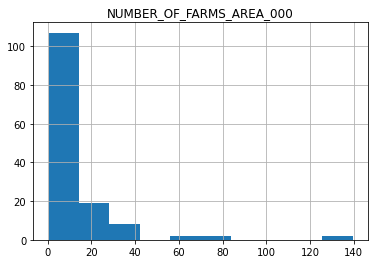

In [16]:
data3.hist("NUMBER_OF_FARMS_AREA_000")

In [ ]:
#Number of farms in year 2016

In [21]:
data4=data3[data3["Year"] == 2016]

In [20]:
data4.head()

,FARM_SIZE,Region,Year,NUMBER_OF_FARMS_AREA_000
3,< 10 ha,"Border, Midland and Western",2016,15.8
23,10 - < 20 ha,"Border, Midland and Western",2016,20.6
43,20 - < 30 ha,"Border, Midland and Western",2016,13.6
63,30 - < 50 ha,"Border, Midland and Western",2016,13.9
83,50 - < 100 ha,"Border, Midland and Western",2016,7.2


In [22]:
data5= data4[data4["FARM_SIZE"] == "All farms"]

In [24]:
data5.head()

,FARM_SIZE,Region,Year,NUMBER_OF_FARMS_AREA_000
121,All farms,State,2016,137.5
123,All farms,"Border, Midland and Western",2016,72.5
125,All farms,Border,2016,28.4
127,All farms,Midland,2016,12.8
129,All farms,West,2016,31.4


In [161]:
data5.describe()

,Year,NUMBER_OF_FARMS_AREA_000
count,10.0,10.000000
mean,2016.0,1.460000
std,0.0,1.496069
min,2016.0,0.400000
25%,2016.0,0.500000
50%,2016.0,0.950000
75%,2016.0,1.325000
max,2016.0,4.900000


In [25]:
data6 = data5.groupby("Region")["NUMBER_OF_FARMS_AREA_000"].sum().sort_values()

In [26]:
data6

Region
Dublin plus Mid East            10.3
Midland                         12.8
Mid-West                        15.9
South-East                      16.5
South-West                      22.3
Border                          28.4
West                            31.4
Southern and Eastern            65.0
Border, Midland and Western     72.5
State                          137.5
Name: NUMBER_OF_FARMS_AREA_000, dtype: float64

Text(20.125, 0.5, 'Number of Farms (000)')

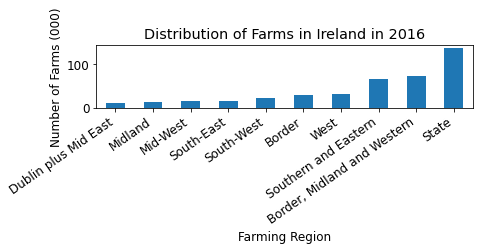

In [279]:
data6.plot(kind='bar', x='Region', y='NUMBER_OF_FARMS_AREA_000')
plt.tight_layout()
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=35, horizontalalignment="right")
plt.title("Distribution of Farms in Ireland in 2016")
plt.xlabel("Farming Region")
plt.ylabel("Number of Farms (000)")

In [ ]:
Tab=pd.merge(Facts10, Figures6, on="FARM_TYPE", how="inner")

In [ ]:
#Largest farms in Ireland

In [29]:
data7= data4[data4["FARM_SIZE"] == ">= 100 ha"]

In [30]:
data7.head()

,FARM_SIZE,Region,Year,NUMBER_OF_FARMS_AREA_000
101,>= 100 ha,State,2016,4.9
103,>= 100 ha,"Border, Midland and Western",2016,1.4
105,>= 100 ha,Border,2016,0.5
107,>= 100 ha,Midland,2016,0.5
109,>= 100 ha,West,2016,0.4


In [31]:
data8 = data7.groupby("Region")["NUMBER_OF_FARMS_AREA_000"].sum().sort_values()

In [32]:
data8

Region
West                           0.4
Border                         0.5
Mid-West                       0.5
Midland                        0.5
Dublin plus Mid East           0.9
South-West                     1.0
South-East                     1.1
Border, Midland and Western    1.4
Southern and Eastern           3.4
State                          4.9
Name: NUMBER_OF_FARMS_AREA_000, dtype: float64

In [245]:
3.4/4.9*100

69.3877551020408

Text(35.375, 0.5, 'Number of Farms (000)')

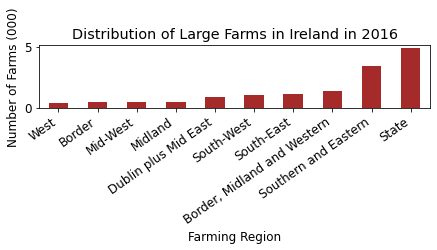

In [280]:
data8.plot(kind='bar', x='Region', y='NUMBER_OF_FARMS_AREA_000', color="brown")
plt.tight_layout(), 
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=35, horizontalalignment="right")
plt.title("Distribution of Large Farms in Ireland in 2016")
plt.xlabel("Farming Region")
plt.ylabel("Number of Farms (000)")

In [ ]:
#Smallest farms in Ireland

In [34]:
data9= data4[data4["FARM_SIZE"] == "< 10 ha"]

In [35]:
data9.head()

,FARM_SIZE,Region,Year,NUMBER_OF_FARMS_AREA_000
1,< 10 ha,State,2016,26.2
3,< 10 ha,"Border, Midland and Western",2016,15.8
5,< 10 ha,Border,2016,6.6
7,< 10 ha,Midland,2016,2.1
9,< 10 ha,West,2016,7.1


In [36]:
data10 = data9.groupby("Region")["NUMBER_OF_FARMS_AREA_000"].sum().sort_values()

In [37]:
data10

Region
Dublin plus Mid East            1.9
Midland                         2.1
Mid-West                        2.3
South-East                      2.6
South-West                      3.6
Border                          6.6
West                            7.1
Southern and Eastern           10.4
Border, Midland and Western    15.8
State                          26.2
Name: NUMBER_OF_FARMS_AREA_000, dtype: float64

In [246]:
15.8/26.2*100

60.30534351145038

Text(27.75, 0.5, 'Number of Farms (000)')

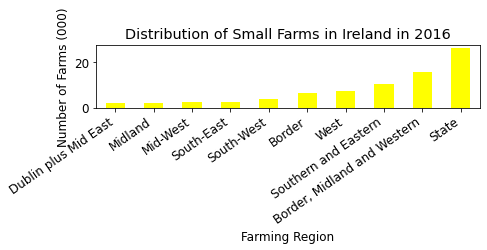

In [281]:
data10.plot(kind='bar', x='Region', y='NUMBER_OF_FARMS_AREA_000', color="yellow")
plt.tight_layout()
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=35, horizontalalignment="right")
plt.title("Distribution of Small Farms in Ireland in 2016")
plt.xlabel("Farming Region")
plt.ylabel("Number of Farms (000)")

In [39]:
#importing second dataset, saved in from my computer

In [40]:
Facts1=pd.read_excel(r"C:\Users\Chaagi\Desktop\PhD UCD\D\Data Analytics\NFS02.xlsx")

In [41]:
Facts1.head()

,STATISTIC CODE,Statistic,C02084V02518,Type of Farm,C02196V02652,Region,TLIST(A1),Year,UNIT,VALUE
0,FSA02,Number of Farms,-,All farms,-,State,2013,2013,Thousand,139.6
1,FSA02,Number of Farms,-,All farms,-,State,2016,2016,Thousand,137.5
2,FSA02,Number of Farms,-,All farms,IE1,"Border, Midland and Western",2013,2013,Thousand,73.6
3,FSA02,Number of Farms,-,All farms,IE1,"Border, Midland and Western",2016,2016,Thousand,72.5
4,FSA02,Number of Farms,-,All farms,IE11,Border,2013,2013,Thousand,28.7


In [42]:
Facts2=Facts1.rename(columns={"Type of Farm":"FARM_TYPE", "VALUE":"NUMBER_OF_FARMS_TYPE_000"})

In [43]:
Facts2.head()

,STATISTIC CODE,Statistic,C02084V02518,FARM_TYPE,C02196V02652,Region,TLIST(A1),Year,UNIT,NUMBER_OF_FARMS_TYPE_000
0,FSA02,Number of Farms,-,All farms,-,State,2013,2013,Thousand,139.6
1,FSA02,Number of Farms,-,All farms,-,State,2016,2016,Thousand,137.5
2,FSA02,Number of Farms,-,All farms,IE1,"Border, Midland and Western",2013,2013,Thousand,73.6
3,FSA02,Number of Farms,-,All farms,IE1,"Border, Midland and Western",2016,2016,Thousand,72.5
4,FSA02,Number of Farms,-,All farms,IE11,Border,2013,2013,Thousand,28.7


In [44]:
Facts3=Facts2[["FARM_TYPE", "Region","Year", "NUMBER_OF_FARMS_TYPE_000"]]

In [45]:
Facts3.head()

,FARM_TYPE,Region,Year,NUMBER_OF_FARMS_TYPE_000
0,All farms,State,2013,139.6
1,All farms,State,2016,137.5
2,All farms,"Border, Midland and Western",2013,73.6
3,All farms,"Border, Midland and Western",2016,72.5
4,All farms,Border,2013,28.7


In [46]:
Facts3.isnull().sum()

FARM_TYPE                   0
Region                      0
Year                        0
NUMBER_OF_FARMS_TYPE_000    0
dtype: int64

In [158]:
Facts3.duplicated().sum()

0

In [159]:
Facts3.describe()

,Year,NUMBER_OF_FARMS_TYPE_000
count,180.000000,180.000000
mean,2014.500000,9.238889
std,1.504184,20.058622
min,2013.000000,0.100000
25%,2013.000000,0.700000
50%,2014.500000,1.700000
75%,2016.000000,8.800000
max,2016.000000,139.600000


array([[<AxesSubplot:title={'center':'NUMBER_OF_FARMS_TYPE_000'}>]],
      dtype=object)

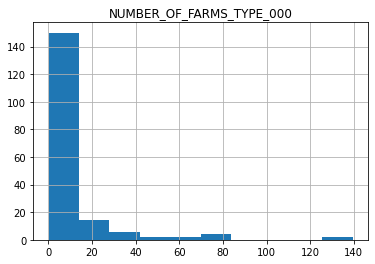

In [160]:
Facts3.hist("NUMBER_OF_FARMS_TYPE_000")

In [ ]:
#Number of farm types in 2016

In [50]:
Facts4=Facts3[Facts3["Year"] == 2016]

In [51]:
Facts4.head()

,FARM_TYPE,Region,Year,NUMBER_OF_FARMS_TYPE_000
1,All farms,State,2016,137.5
3,All farms,"Border, Midland and Western",2016,72.5
5,All farms,Border,2016,28.4
7,All farms,Midland,2016,12.8
9,All farms,West,2016,31.4


In [ ]:
#Type of farms in Border, Midland and Western region

In [52]:
Facts5= Facts4[Facts4["Region"] == "Border, Midland and Western"]

In [53]:
Facts5.head()

,FARM_TYPE,Region,Year,NUMBER_OF_FARMS_TYPE_000
3,All farms,"Border, Midland and Western",2016,72.5
23,Specialist tillage,"Border, Midland and Western",2016,1.0
43,Specialist dairying,"Border, Midland and Western",2016,3.6
63,Specialist beef production,"Border, Midland and Western",2016,46.0
83,Specialist sheep,"Border, Midland and Western",2016,10.3


In [54]:
Facts6 = Facts5.groupby("FARM_TYPE")["NUMBER_OF_FARMS_TYPE_000"].sum().sort_values()

In [55]:
Facts6

FARM_TYPE
Mixed crops and livestock      0.6
Other                          0.6
Specialist tillage             1.0
Specialist dairying            3.6
Mixed field crops              3.9
Mixed grazing livestock        6.5
Specialist sheep              10.3
Specialist beef production    46.0
All farms                     72.5
Name: NUMBER_OF_FARMS_TYPE_000, dtype: float64

Text(-113.5, 0.5, 'Farm Type')

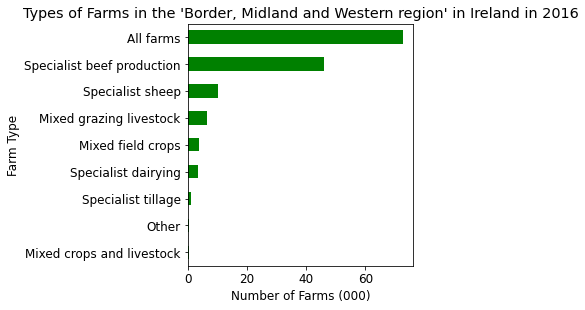

In [242]:
Facts6.plot(kind='barh', x='FARM_TYPE', y='NUMBER_OF_FARMS_TYPE_000', color="green")
plt.tight_layout()
plt.rcParams.update({'font.size': 12})

plt.title("Types of Farms in the 'Border, Midland and Western region' in Ireland in 2016")
plt.xlabel("Number of Farms (000)")
plt.ylabel("Farm Type")

In [244]:
46/72.5*100

63.44827586206897

In [ ]:
#Importing data set 3

In [65]:
Figures1=pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FSA07/CSV/1.0/en")

In [66]:
Figures1.head()

,C02084V02518,Type of Farm,TLIST(A1),Year,STATISTIC CODE,Statistic,UNIT,VALUE
0,-,All farms,2013,2013,FSA07C01,Average Farm Size,Thousand,32.5
1,-,All farms,2013,2013,FSA07C02,Average Farm Economic Size,Euro,35912.0
2,-,All farms,2016,2016,FSA07C01,Average Farm Size,Thousand,32.4
3,-,All farms,2016,2016,FSA07C02,Average Farm Economic Size,Euro,45855.0
4,01,Specialist tillage,2013,2013,FSA07C01,Average Farm Size,Thousand,56.8


In [83]:
Figures2=Figures1[Figures1.UNIT != 'Euro']

In [84]:
Figures2.head()

,C02084V02518,Type of Farm,TLIST(A1),Year,STATISTIC CODE,Statistic,UNIT,VALUE
0,-,All farms,2013,2013,FSA07C01,Average Farm Size,Thousand,32.5
2,-,All farms,2016,2016,FSA07C01,Average Farm Size,Thousand,32.4
4,01,Specialist tillage,2013,2013,FSA07C01,Average Farm Size,Thousand,56.8
6,01,Specialist tillage,2016,2016,FSA07C01,Average Farm Size,Thousand,58.6
8,02,Specialist dairying,2013,2013,FSA07C01,Average Farm Size,Thousand,55.9


In [86]:
Figures3.head()

,C02084V02518,Type of Farm,TLIST(A1),Year,STATISTIC CODE,Statistic,UNIT,VALUE
1,-,All farms,2013,2013,FSA07C02,Average Farm Economic Size,Euro,35912.0
3,-,All farms,2016,2016,FSA07C02,Average Farm Economic Size,Euro,45855.0
5,01,Specialist tillage,2013,2013,FSA07C02,Average Farm Economic Size,Euro,86271.0
7,01,Specialist tillage,2016,2016,FSA07C02,Average Farm Economic Size,Euro,96941.0
9,02,Specialist dairying,2013,2013,FSA07C02,Average Farm Economic Size,Euro,134536.0


In [87]:
Figures3=Figures2.rename(columns={"Type of Farm":"FARM_TYPE", "VALUE":"AVERAGE_FARM_AREA_000"})

In [88]:
Figures3.isnull().sum()

C02084V02518             0
FARM_TYPE                0
TLIST(A1)                0
Year                     0
STATISTIC CODE           0
Statistic                0
UNIT                     0
AVERAGE_FARM_AREA_000    0
dtype: int64

In [89]:
Figures3.duplicated().sum()

0

In [90]:
Figures3.describe()

,TLIST(A1),Year,AVERAGE_FARM_AREA_000
count,18.000000,18.000000,18.000000
mean,2014.500000,2014.500000,37.922222
std,1.543487,1.543487,15.608880
min,2013.000000,2013.000000,15.400000
25%,2013.000000,2013.000000,27.075000
50%,2014.500000,2014.500000,32.450000
75%,2016.000000,2016.000000,56.575000
max,2016.000000,2016.000000,59.200000


array([[<AxesSubplot:title={'center':'AVERAGE_FARM_AREA_000'}>]],
      dtype=object)

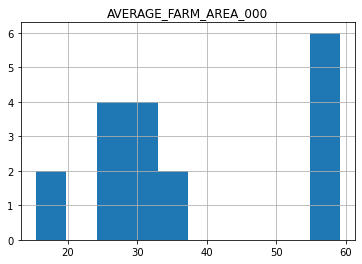

In [91]:
Figures3.hist("AVERAGE_FARM_AREA_000")

In [ ]:
#Merge two data sets

In [92]:
Figures4=Figures3[["FARM_TYPE", "Year", "AVERAGE_FARM_AREA_000"]]

In [93]:
Figures4.head()

,FARM_TYPE,Year,AVERAGE_FARM_AREA_000
0,All farms,2013,32.5
2,All farms,2016,32.4
4,Specialist tillage,2013,56.8
6,Specialist tillage,2016,58.6
8,Specialist dairying,2013,55.9


In [94]:
Figures5=Figures4[Figures3["Year"] == 2016]

In [95]:
Figures5

,FARM_TYPE,Year,AVERAGE_FARM_AREA_000
2,All farms,2016,32.4
6,Specialist tillage,2016,58.6
10,Specialist dairying,2016,59.2
14,Specialist beef production,2016,26.5
18,Specialist sheep,2016,29.0
22,Mixed grazing livestock,2016,36.8
26,Mixed crops and livestock,2016,58.7
30,Mixed field crops,2016,15.4
34,Other,2016,25.4


In [116]:
Figures6=Figures5.drop(["Year"], axis=1)

In [119]:
Figures6

,FARM_TYPE,AVERAGE_FARM_AREA_000
2,All farms,32.4
6,Specialist tillage,58.6
10,Specialist dairying,59.2
14,Specialist beef production,26.5
18,Specialist sheep,29.0
22,Mixed grazing livestock,36.8
26,Mixed crops and livestock,58.7
30,Mixed field crops,15.4
34,Other,25.4


In [103]:
Facts9= Facts4[Facts4["Region"] == "State"]

In [117]:
Facts9

,FARM_TYPE,Region,Year,NUMBER_OF_FARMS_TYPE_000
1,All farms,State,2016,137.5
21,Specialist tillage,State,2016,4.7
41,Specialist dairying,State,2016,16.1
61,Specialist beef production,State,2016,78.3
81,Specialist sheep,State,2016,15.1
101,Mixed grazing livestock,State,2016,11.6
121,Mixed crops and livestock,State,2016,2.1
141,Mixed field crops,State,2016,8.2
161,Other,State,2016,1.3


In [113]:
Facts10=Facts9.drop(["Year", "Region"], axis=1)

In [118]:
Facts10

,FARM_TYPE,NUMBER_OF_FARMS_TYPE_000
1,All farms,137.5
21,Specialist tillage,4.7
41,Specialist dairying,16.1
61,Specialist beef production,78.3
81,Specialist sheep,15.1
101,Mixed grazing livestock,11.6
121,Mixed crops and livestock,2.1
141,Mixed field crops,8.2
161,Other,1.3


In [131]:
Tab=pd.merge(Facts10, Figures6, on="FARM_TYPE", how="inner")

In [132]:
Tab

,FARM_TYPE,NUMBER_OF_FARMS_TYPE_000,AVERAGE_FARM_AREA_000
0,All farms,137.5,32.4
1,Specialist tillage,4.7,58.6
2,Specialist dairying,16.1,59.2
3,Specialist beef production,78.3,26.5
4,Specialist sheep,15.1,29.0
5,Mixed grazing livestock,11.6,36.8
6,Mixed crops and livestock,2.1,58.7
7,Mixed field crops,8.2,15.4
8,Other,1.3,25.4


In [156]:
Tot=Tab["NUMBER_OF_FARMS_TYPE_000"] * Tab["AVERAGE_FARM_AREA_000"]

In [157]:
Tot

0    4455.00
1     275.42
2     953.12
3    2074.95
4     437.90
5     426.88
6     123.27
7     126.28
8      33.02
dtype: float64

In [247]:
Total_Land_2016=pd.DataFrame({"FARM_TYPE":['All farms', 'Specialist tillage', 'Specialist dairying','Specialist beef production', 'Specialist sheep',
'Mixed grazing livestock', 'Mixed crops and livestock', 'Mixed field crops', 'Other'], "LAND_SIZE_000":[4455.00, 275.42, 953.12, 2074.95, 437.90, 426.88, 123.27, 126.28, 33.02]})

In [248]:
Total_Land_2016

,FARM_TYPE,LAND_SIZE_000
0,All farms,4455.00
1,Specialist tillage,275.42
2,Specialist dairying,953.12
3,Specialist beef production,2074.95
4,Specialist sheep,437.90
5,Mixed grazing livestock,426.88
6,Mixed crops and livestock,123.27
7,Mixed field crops,126.28
8,Other,33.02


In [249]:
Total_Land_2016_Sort = Total_Land_2016.groupby("FARM_TYPE")["LAND_SIZE_000"].sum().sort_values()

In [250]:
Total_Land_2016_Sort

FARM_TYPE
Other                           33.02
Mixed crops and livestock      123.27
Mixed field crops              126.28
Specialist tillage             275.42
Mixed grazing livestock        426.88
Specialist sheep               437.90
Specialist dairying            953.12
Specialist beef production    2074.95
All farms                     4455.00
Name: LAND_SIZE_000, dtype: float64

In [270]:
(426.88+123.27+126.28)/4455*100

15.18361391694725

Text(-113.5, 0.5, 'Farm Type')

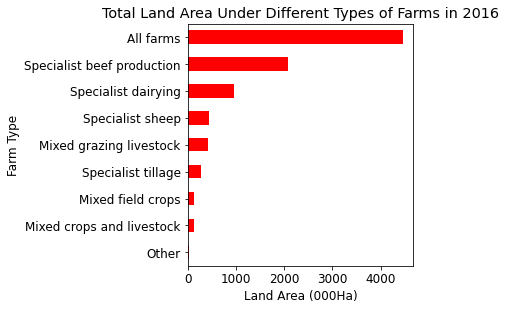

In [251]:
Total_Land_2016_Sort.plot(kind='barh', x='FARM_TYPE', y='LAND_SIZE_000', color="red")
plt.tight_layout()
plt.rcParams.update({'font.size': 12})

plt.title("Total Land Area Under Different Types of Farms in 2016")
plt.xlabel("Land Area (000Ha)")
plt.ylabel("Farm Type")

In [252]:
Final=Facts3[Facts3["Year"] == 2013]

In [253]:
Final

,FARM_TYPE,Region,Year,NUMBER_OF_FARMS_TYPE_000
0,All farms,State,2013,139.6
2,All farms,"Border, Midland and Western",2013,73.6
4,All farms,Border,2013,28.7
6,All farms,Midland,2013,12.9
8,All farms,West,2013,32.0
...,...,...,...,...
170,Other,Southern and Eastern,2013,0.7
172,Other,Dublin plus Mid East,2013,0.2
174,Other,Mid-West,2013,0.1
176,Other,South-East,2013,0.2


In [254]:
Final1= Final[Final["Region"] == "State"]

In [255]:
Final1

,FARM_TYPE,Region,Year,NUMBER_OF_FARMS_TYPE_000
0,All farms,State,2013,139.6
20,Specialist tillage,State,2013,5.3
40,Specialist dairying,State,2013,15.6
60,Specialist beef production,State,2013,78.8
80,Specialist sheep,State,2013,15.0
100,Mixed grazing livestock,State,2013,13.1
120,Mixed crops and livestock,State,2013,2.6
140,Mixed field crops,State,2013,7.9
160,Other,State,2013,1.3


In [256]:
Final2=Final1.drop(["Year", "Region"], axis=1)

In [257]:
Figures11=Figures4[Figures3["Year"] == 2013]

In [258]:
Figures11

,FARM_TYPE,Year,AVERAGE_FARM_AREA_000
0,All farms,2013,32.5
4,Specialist tillage,2013,56.8
8,Specialist dairying,2013,55.9
12,Specialist beef production,2013,27.0
16,Specialist sheep,2013,29.6
20,Mixed grazing livestock,2013,36.8
24,Mixed crops and livestock,2013,58.7
28,Mixed field crops,2013,27.3
32,Other,2013,16.0


In [259]:
Figures2=Figures11.drop(["Year",], axis=1)

In [260]:
Land_2013=pd.merge(Final2, Figures2, on="FARM_TYPE", how="inner")

In [261]:
Land_2013

,FARM_TYPE,NUMBER_OF_FARMS_TYPE_000,AVERAGE_FARM_AREA_000
0,All farms,139.6,32.5
1,Specialist tillage,5.3,56.8
2,Specialist dairying,15.6,55.9
3,Specialist beef production,78.8,27.0
4,Specialist sheep,15.0,29.6
5,Mixed grazing livestock,13.1,36.8
6,Mixed crops and livestock,2.6,58.7
7,Mixed field crops,7.9,27.3
8,Other,1.3,16.0


In [262]:
Land_2013_2=Land_2013["NUMBER_OF_FARMS_TYPE_000"] * Land_2013["AVERAGE_FARM_AREA_000"]

In [263]:
Land_2013_2

0    4537.00
1     301.04
2     872.04
3    2127.60
4     444.00
5     482.08
6     152.62
7     215.67
8      20.80
dtype: float64

In [264]:
Total_Land_2013=pd.DataFrame({"FARM_TYPE":['All farms', 'Specialist tillage', 'Specialist dairying','Specialist beef production', 'Specialist sheep',
'Mixed grazing livestock', 'Mixed crops and livestock', 'Mixed field crops', 'Other'], "LAND_SIZE_000":[4537.00, 301.04, 872.04, 2127.60, 444.00, 482.08, 152.62, 215.67, 20.80]})


In [282]:
(4537-4455)/4537*100

1.807361692748512

Text(0, 0.5, 'Total Land Area (Ha000)')

<Figure size 432x288 with 0 Axes>

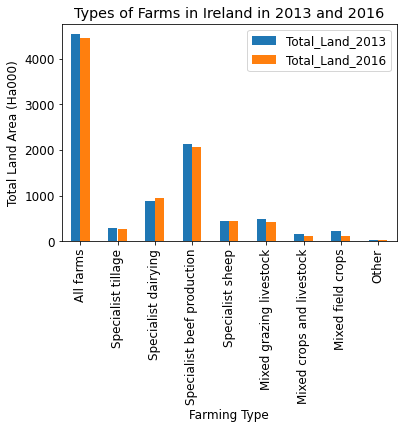

In [271]:
Total_Land_2013_2016 = pd.DataFrame({'Total_Land_2013': [4537.00, 301.04, 872.04, 2127.60, 444.00, 482.08, 152.62, 215.67, 20.80],
   'Total_Land_2016': [4455.00, 275.42, 953.12, 2074.95, 437.90, 426.88, 123.27, 126.28, 33.02]}, index=['All farms', 'Specialist tillage', 'Specialist dairying','Specialist beef production', 'Specialist sheep',
'Mixed grazing livestock', 'Mixed crops and livestock', 'Mixed field crops', 'Other'])
plt.figure()
plt.rcParams.update({'font.size': 12})
Total_Land_2013_2016.reset_index().plot(x="index", y=["Total_Land_2013", "Total_Land_2016"], kind="bar")

plt.title("Types of Farms in Ireland in 2013 and 2016")
plt.xlabel("Farming Type")
plt.ylabel("Total Land Area (Ha000)")